# Imports

In [18]:
from geopy.geocoders import Nominatim
from geopy.distance import distance
from pprint import pprint
import pandas as pd
import random
from typing import List, Tuple
from dotenv import dotenv_values
random.seed(123)
config = dotenv_values(".env")

# Cities

In [2]:
country = "Ukraine"
cities = ["Lviv", "Chernihiv", "Dnipropetrovs'k", "Uzhgorod", "Kharkiv", "Odesa", 
          "Poltava", "Kiev", "Zhytomyr", "Khmelnytskyi", "Vinnytsia","Cherkasy",
          "Zaporizhia", "Ternopil", "Sumy"]

# 1) Get Distinct Distance using geopy API


In [3]:
def get_distinct_distances(list:cities, str: country) -> pd.DataFrame:
    df = pd.DataFrame(index = cities, columns= cities)
    geolocator = Nominatim(user_agent=config["USER_AGENT"], timeout = 10000)
    coordinates = dict()
    for city in cities:
        location = geolocator.geocode(city + " " + country)
        coordinates[city] = (location.latitude, location.longitude)
    for origin in range(len(cities)):
        for destination in range(origin, len(cities)):
            dist = distance(coordinates[cities[origin]], coordinates[cities[destination]]).km
            df[cities[origin]][cities[destination]] = dist
            df[cities[destination]][cities[origin]] = dist
    return df, coordinates

In [4]:
df_distinct, coordinates = get_distinct_distances(cities, country)
df_distinct.head(15)

,Lviv,Chernihiv,Dnipropetrovs'k,Uzhgorod,Kharkiv,Odesa,Poltava,Kiev,Zhytomyr,Khmelnytskyi,Vinnytsia,Cherkasy,Zaporizhia,Ternopil,Sumy
Lviv,0.0,568.763066,713.95376,185.084459,875.337343,622.58559,698.41876,468.823538,331.668225,228.441202,342.099738,526.789867,915.957697,115.950362,774.309082
Chernihiv,568.763066,0.0,393.389947,738.153895,348.012347,537.198441,211.897482,125.385464,238.504466,401.028704,350.638959,239.378661,525.390147,470.091321,217.967035
Dnipropetrovs'k,713.95376,393.389947,0.0,820.588474,317.452204,249.017561,222.110344,350.040797,490.321674,485.549502,372.228574,208.016577,203.29521,598.513091,353.083916
Uzhgorod,185.084459,738.153895,820.588474,0.0,1022.759249,677.479704,844.019119,628.480405,506.503063,356.038727,457.756114,656.764443,1023.475787,268.06692,934.157585
Kharkiv,875.337343,348.012347,317.452204,1022.759249,0.0,563.893499,178.74918,410.344303,566.080894,666.731991,572.242728,373.907649,287.335577,763.949224,143.890562
Odesa,622.58559,537.198441,249.017561,677.479704,563.893499,0.0,436.768011,440.937896,521.141391,413.696823,315.804633,297.85951,407.812652,519.77144,574.984058
Poltava,698.41876,211.897482,222.110344,844.019119,178.74918,436.768011,0.0,239.639967,398.725165,487.986744,394.716394,199.253751,315.451736,586.110093,138.217326
Kiev,468.823538,125.385464,350.040797,628.480405,410.344303,440.937896,239.639967,0.0,159.425829,281.35449,225.295729,153.615805,519.649625,362.089986,306.312276
Zhytomyr,331.668225,238.504466,490.321674,506.503063,566.080894,521.141391,398.725165,159.425829,0.0,205.465598,223.650756,282.516225,672.436525,241.12577,450.83421
Khmelnytskyi,228.441202,401.028704,485.549502,356.038727,666.731991,413.696823,487.986744,281.35449,205.465598,0.0,113.782154,303.657489,687.799994,113.677829,582.43746


# Download file to local

In [5]:
df_distinct.to_csv("data/direct_distances.csv")

# 2) Get route distance using Openrouteservice API

In [6]:
import openrouteservice 
from pprint import pprint
def get_route_dataframe(coordinates: dict)->pd.DataFrame:
    client = openrouteservice.Client(key=config['API_KEY'])
    cities = list(coordinates.keys())
    df = pd.DataFrame(index = cities, columns= cities)
    for origin in range(len(coordinates.keys())):
        for destination in range(origin, len(coordinates.keys())):
            if origin != destination:
                l2 = ((coordinates[cities[origin]][1], coordinates[cities[origin]][0]),
                      (coordinates[cities[destination]][1], coordinates[cities[destination]][0]))
                distance = client.directions(l2, units="km", radiuses=-1)['routes'][0]['segments'][0]['distance']
                df[cities[origin]][cities[destination]] = df[cities[destination]][cities[origin]] = distance
            else:
                df[cities[origin]][cities[destination]] = df[cities[destination]][cities[origin]] = 0
    return df

In [7]:
import warnings
warnings.filterwarnings('ignore')
df_routes = get_route_dataframe(coordinates)
df_routes.head(15)

,Lviv,Chernihiv,Dnipropetrovs'k,Uzhgorod,Kharkiv,Odesa,Poltava,Kiev,Zhytomyr,Khmelnytskyi,Vinnytsia,Cherkasy,Zaporizhia,Ternopil,Sumy
Lviv,0,706.462,818.944,247.465,1008.2,797.721,816.849,539.994,381.534,253.754,391.537,630.782,1089.847,135.711,873.205
Chernihiv,706.462,0,474.532,982.326,463.21,638.808,271.859,167.152,343.352,530.001,474.557,347.671,638.549,606.393,242.1
Dnipropetrovs'k,818.944,474.532,0,1045.793,374.024,299.558,269.849,496.723,650.096,578.139,435.425,250.663,309.164,707.977,450.497
Uzhgorod,247.465,982.326,1045.793,0,1276.303,1020.145,1084.952,808.097,674.394,476.178,613.961,853.206,1312.271,368.314,1141.307
Kharkiv,1008.2,463.21,374.024,1276.303,0,673.141,221.415,468.971,651.45,830.657,693.503,477.954,373.834,907.049,183.826
Odesa,797.721,638.808,299.558,1020.145,673.141,0,576.096,476.091,629.464,557.835,415.121,363.575,517.644,687.673,805.626
Poltava,816.849,271.859,269.849,1084.952,221.415,576.096,0,278.084,460.563,639.77,584.326,281.405,388.7,716.162,177.202
Kiev,539.994,167.152,496.723,808.097,468.971,476.091,278.084,0,184.273,363.48,308.036,187.602,646.077,439.872,333.211
Zhytomyr,381.534,343.352,650.096,674.394,651.45,629.464,460.563,184.273,0,260.881,259.706,373.58,828.299,316.688,509.501
Khmelnytskyi,253.754,530.001,578.139,476.178,830.657,557.835,639.77,363.48,260.881,0,141.068,390.357,849.422,143.487,693.669


# Download file to local

In [8]:
df_routes.to_csv("data/route_distances.csv")

# A* Algorithm

In [19]:
class AStar():
    def __init__(self, cities: list[str], country: str, distances: pd.DataFrame, heuristics: pd.DataFrame):
        self.cities = cities
        self.country = country
        self.distances = distances
        self.heuristics = heuristics
    
    def generate_map(self, low, high) -> dict[str, list[str]]:
        from networkx.generators.degree_seq import random_degree_sequence_graph
        import numpy as np
        import networkx as nx
        degrees = np.random.randint(low, high, len(self.cities))
        while not nx.is_graphical(degrees):
            degrees = np.random.randint(low, high, len(self.cities))
        graph = random_degree_sequence_graph(degrees)
        graph = nx.relabel.relabel_nodes(graph, mapping=dict(zip(range(15), self.cities)))
        graph = nx.to_dict_of_lists(graph)
        return graph
    
    def restore_path(self, current, camefrom: dict) -> list[str]:
        path = [current]
        while current in camefrom.keys():
            current = camefrom[current]
            path.insert(0, current)
        return path
    
    def run(self, origin:str, destination:str, country:str) -> Tuple[List[str], float]:
        gscore = dict().fromkeys(cities, float("inf"))
        gscore[origin] = 0
        fscore = dict().fromkeys(cities, float("inf"))
        fscore[origin] = self.heuristics[origin][destination]
        camefrom = dict()
        openset = []
        openset.append(origin)
        openset = list(sorted(openset, key = lambda x: fscore[x]))
        closed = []
        while openset:
            current_city = openset.pop(0)
            closed.append(current_city)                
            if current_city == destination:
                return self.restore_path(current_city, camefrom), gscore[current_city]
            for neighbour in country[current_city]:
                if neighbour not in closed:
                    tentative_gScore = gscore[current_city] + self.distances[current_city][neighbour]
                    if tentative_gScore < gscore[neighbour]:
                        camefrom[neighbour] = current_city
                        gscore[neighbour] = tentative_gScore
                        fscore[neighbour]  = gscore[neighbour] + self.heuristics[neighbour][destination]
                        if neighbour not in openset:
                            openset.append(neighbour)
                            openset = list(sorted(openset, key = lambda x: fscore[x]))
        return (None, 0)

In [10]:
low = 3
high = 5
distances = pd.read_csv("data/route_distances.csv", index_col = 0)
heuristic = pd.read_csv("data/direct_distances.csv",index_col = 0)
a_star = AStar(cities, country, distances, heuristic)

In [11]:
pprint(a_star.generate_map(low,high))

{'Cherkasy': ['Chernihiv', 'Odesa', 'Zhytomyr', 'Ternopil'],
 'Chernihiv': ["Dnipropetrovs'k", 'Poltava', 'Cherkasy', 'Kharkiv'],
 "Dnipropetrovs'k": ['Lviv', 'Chernihiv', 'Poltava'],
 'Kharkiv': ['Chernihiv', 'Sumy', 'Vinnytsia'],
 'Khmelnytskyi': ['Uzhgorod', 'Odesa', 'Ternopil'],
 'Kiev': ['Lviv', 'Poltava', 'Sumy', 'Zaporizhia'],
 'Lviv': ['Odesa', 'Zhytomyr', 'Kiev', "Dnipropetrovs'k"],
 'Odesa': ['Lviv', 'Uzhgorod', 'Cherkasy', 'Khmelnytskyi'],
 'Poltava': ['Chernihiv', "Dnipropetrovs'k", 'Vinnytsia', 'Kiev'],
 'Sumy': ['Kharkiv', 'Kiev', 'Zhytomyr'],
 'Ternopil': ['Khmelnytskyi', 'Vinnytsia', 'Cherkasy'],
 'Uzhgorod': ['Odesa', 'Vinnytsia', 'Khmelnytskyi', 'Zaporizhia'],
 'Vinnytsia': ['Uzhgorod', 'Kharkiv', 'Poltava', 'Ternopil'],
 'Zaporizhia': ['Uzhgorod', 'Kiev', 'Zhytomyr'],
 'Zhytomyr': ['Lviv', 'Sumy', 'Cherkasy', 'Zaporizhia']}


# Display the Graph

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

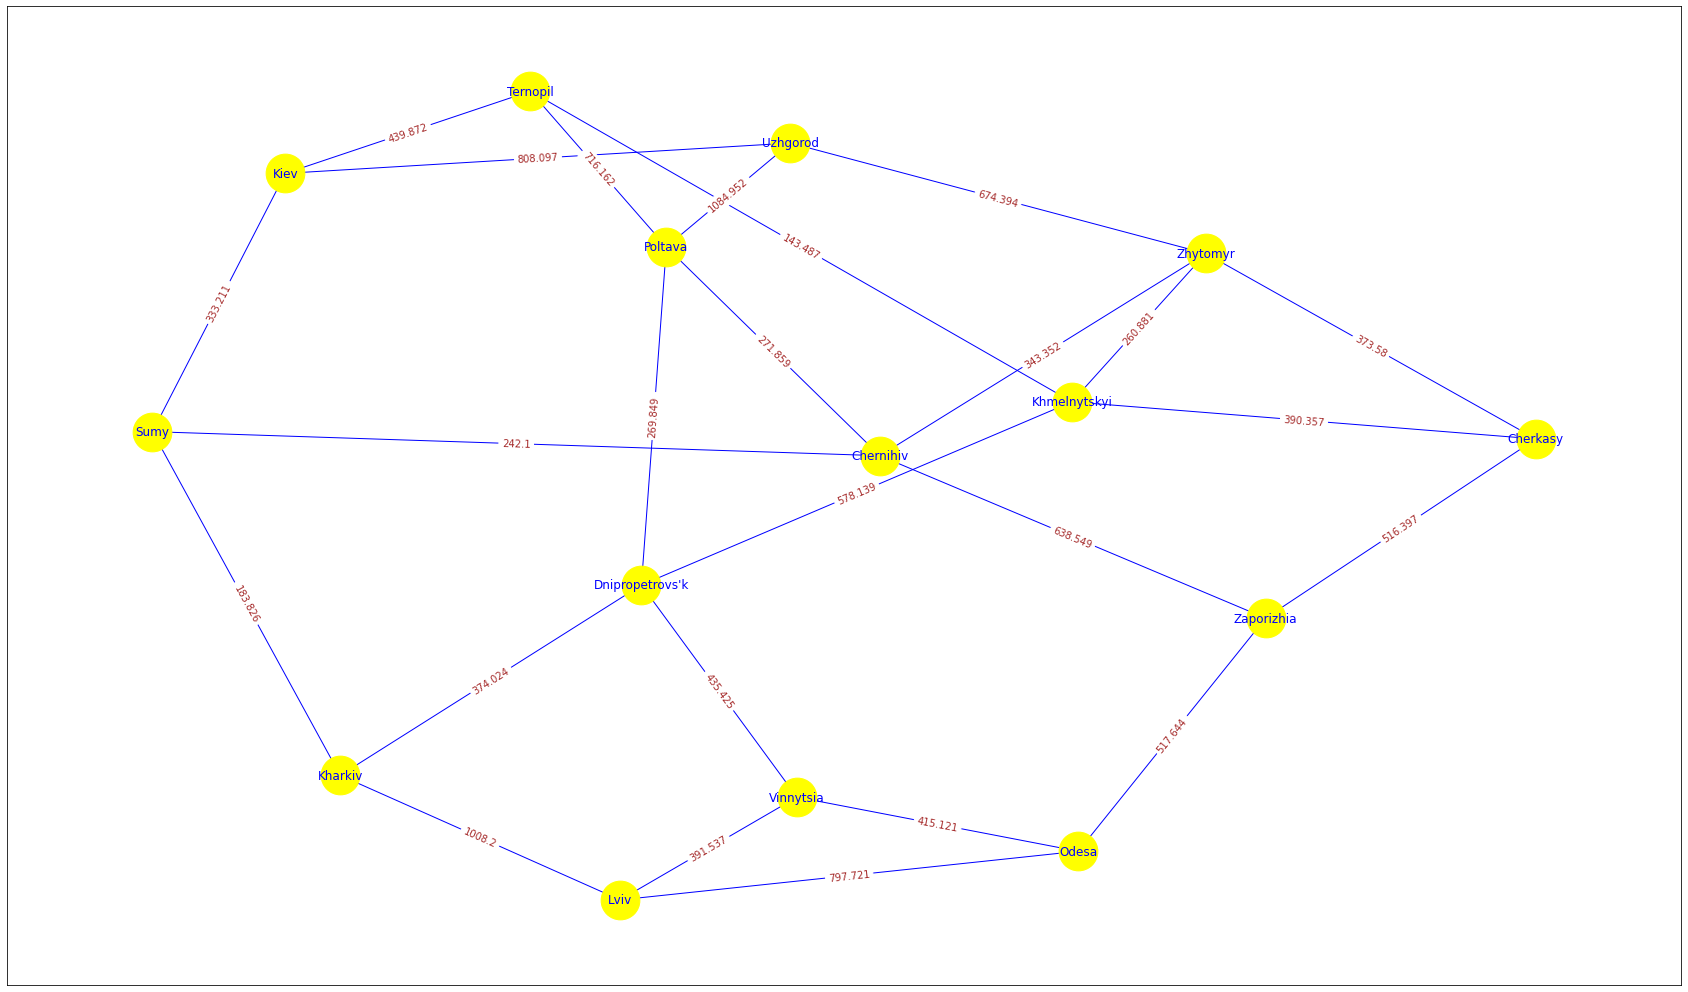

In [13]:
Map = a_star.generate_map(low, high)
graph = nx.Graph()
graph.add_nodes_from(Map.keys())
for origin, destinations in Map.items():
    graph.add_weighted_edges_from(([(origin, destination, weight) for destination, weight in zip(destinations, [distances[origin][dest] for dest in destinations])]))
pos = nx.fruchterman_reingold_layout(graph, seed = 321)
plt.figure(figsize = (30, 18))
nx.draw_networkx_nodes(graph, pos, node_color="yellow",label="blue", node_size = 1500)
nx.draw_networkx_labels(graph, pos, font_color="blue")
nx.draw_networkx_edges(graph, pos, edge_color='blue')
nx.draw_networkx_edge_labels(graph,pos, edge_labels=nx.get_edge_attributes(graph,'weight'), font_color = "brown")
plt.show()

In [14]:
path, distance = a_star.run("Vinnytsia",'Poltava', Map)
print("Solution:{}\nDistance:{}".format(",".join(path), distance))

Solution:Vinnytsia,Dnipropetrovs'k,Poltava
Distance:705.274


# Draw the solution

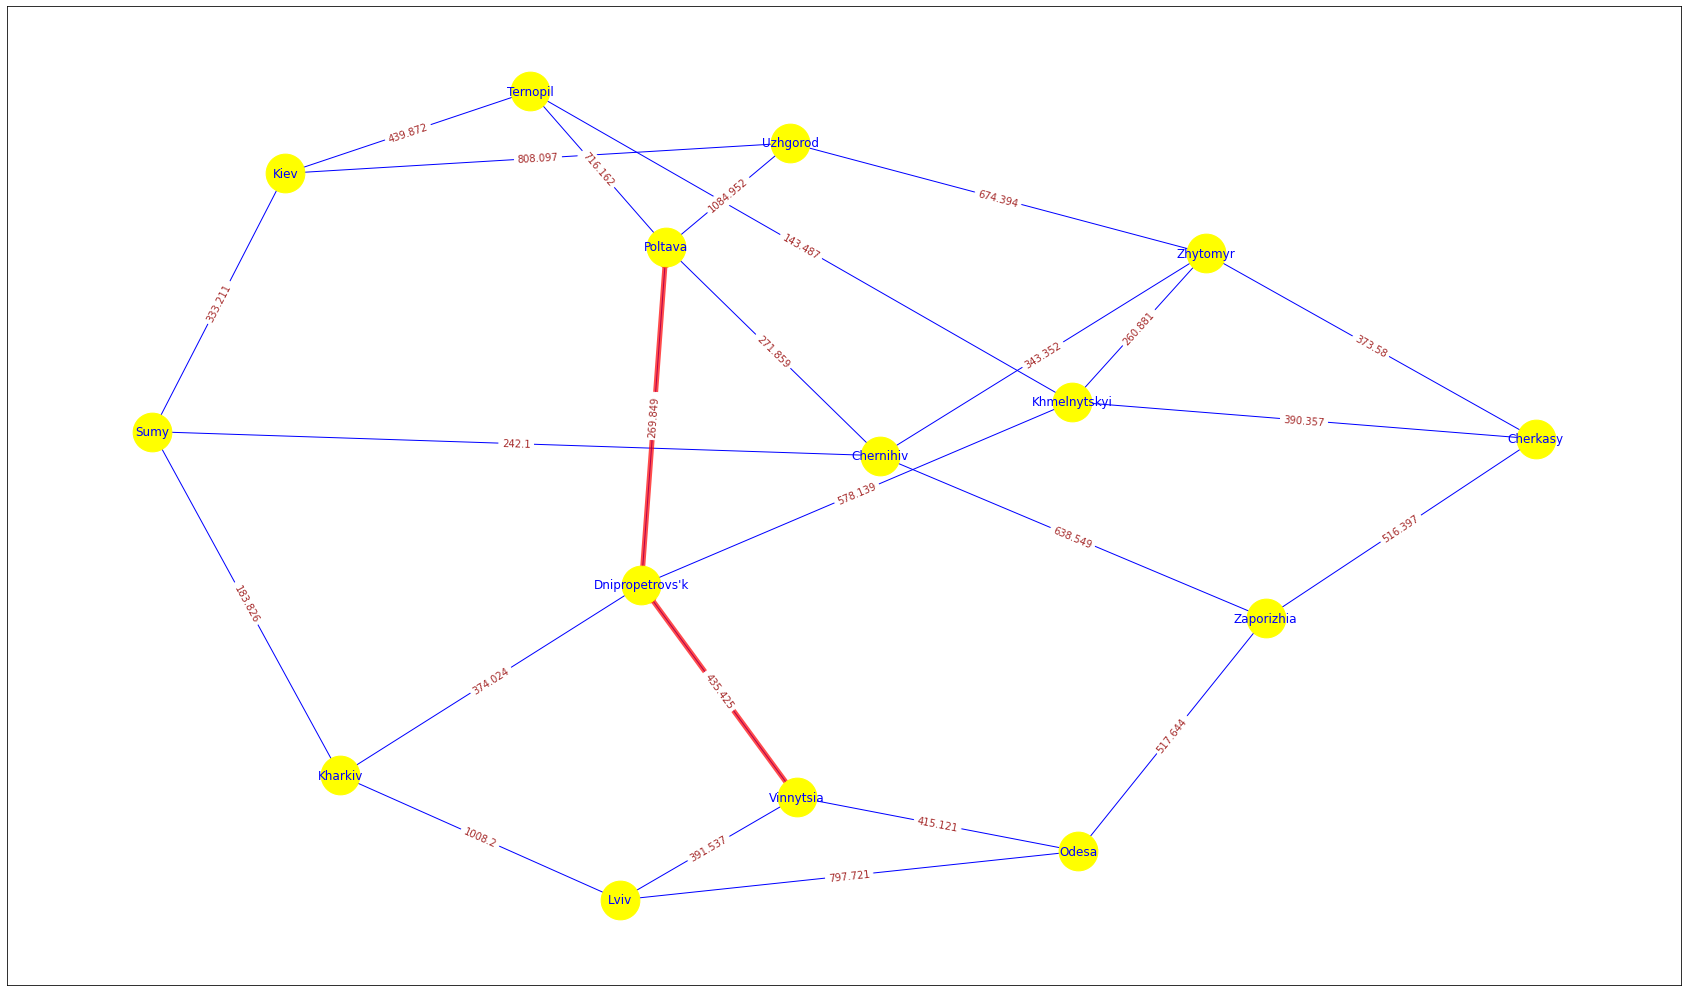

In [15]:
edges = [(path[i-1], path[i]) for i in range(1, len(path))]
plt.figure(figsize = (30, 18))
nx.draw_networkx_nodes(graph, pos, node_color="yellow",label="blue", node_size = 1500)
nx.draw_networkx_labels(graph, pos, font_color="blue")
nx.draw_networkx_edges(graph, pos, edge_color='blue', arrows=False)
nx.draw_networkx_edges(graph, pos, edgelist=edges ,edge_color='red', width = 5, alpha = 0.7, arrows=True)
nx.draw_networkx_edge_labels(graph,pos, edge_labels=nx.get_edge_attributes(graph,'weight'), font_color = "brown")
plt.show()